## Import modules


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

from fastai.vision import *
from fastai.metrics import error_rate



%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Mount google drive

In [3]:
current_project = "afl_nrl"

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

dest = Path(base_dir + "models/" + current_project)
try:
  dest.mkdir(parents=True, exist_ok=False)
except FileExistsError:
  print ('File Already Exists')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
File Already Exists


## Create folders and download images from Google images

In [0]:
folder = dest / "AFL"
folder.mkdir(parents=True, exist_ok=True)

In [0]:
folder = dest / "NRL"
folder.mkdir(parents=True, exist_ok=True)

In [5]:
path = dest / "AFL"
file = dest / "urls_AFL.csv"
download_images(file, dest=path, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [6]:
path = dest / "NRL"
file = dest / "urls_NRL.csv"
download_images(file, dest=path, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?


Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

## View the downloaded data

In [4]:
classes = ['AFL','NRL']
for c in classes:
  verify_images(dest/c, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(dest, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [6]:
data.classes

['AFL', 'NRL']

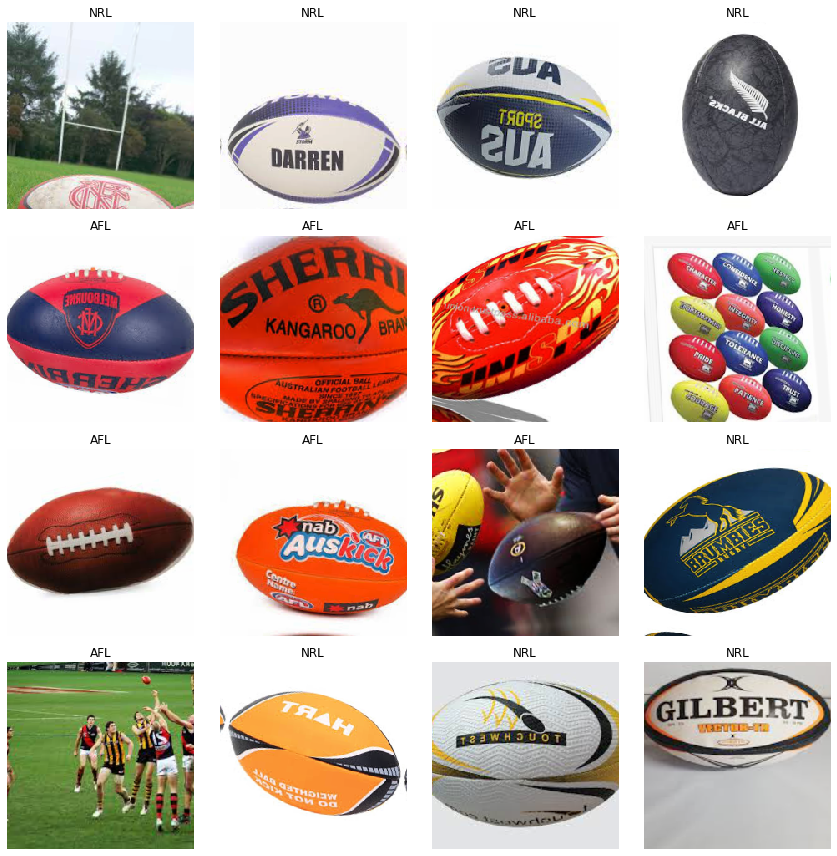

In [7]:
data.show_batch(rows=4, figsize=(12,12))

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['AFL', 'NRL'], 2, 256, 64)

## Train models

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [41]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.446093,0.781437,0.406250,00:03
1,0.986877,0.320839,0.109375,00:03
2,0.744134,0.305794,0.062500,00:03
3,0.614421,0.270970,0.062500,00:03
4,0.517279,0.253552,0.062500,00:03
5,0.442255,0.235650,0.062500,00:03


In [0]:
learn.save(dest/'stage-1')

In [0]:
learn.unfreeze()

In [44]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


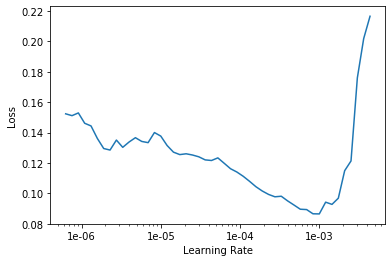

In [45]:
learn.recorder.plot()

In [46]:
learn.fit_one_cycle(4, max_lr=slice(5e-4,4e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.407783,1.559066,0.125000,00:03
1,0.624642,7.048145,0.156250,00:03
2,0.560498,5.382588,0.218750,00:03
3,0.467002,2.357518,0.218750,00:03


## Model interpretation

In [47]:
learn.load(dest / 'stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (256 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
AFL,AFL,AFL,AFL,AFL
Path: /content/gdrive/My Drive/fastai-v3/models/afl_nrl;

Valid: LabelList (64 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NRL,NRL,AFL,AFL,AFL
Path: /content/gdrive/My Drive/fastai-v3/models/afl_nrl;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm

In [48]:
interp = ClassificationInterpretation.from_learner(learn)

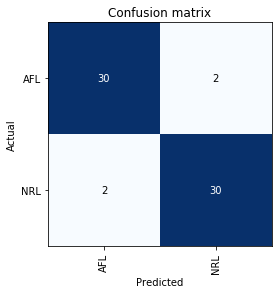

In [50]:
interp.plot_confusion_matrix()

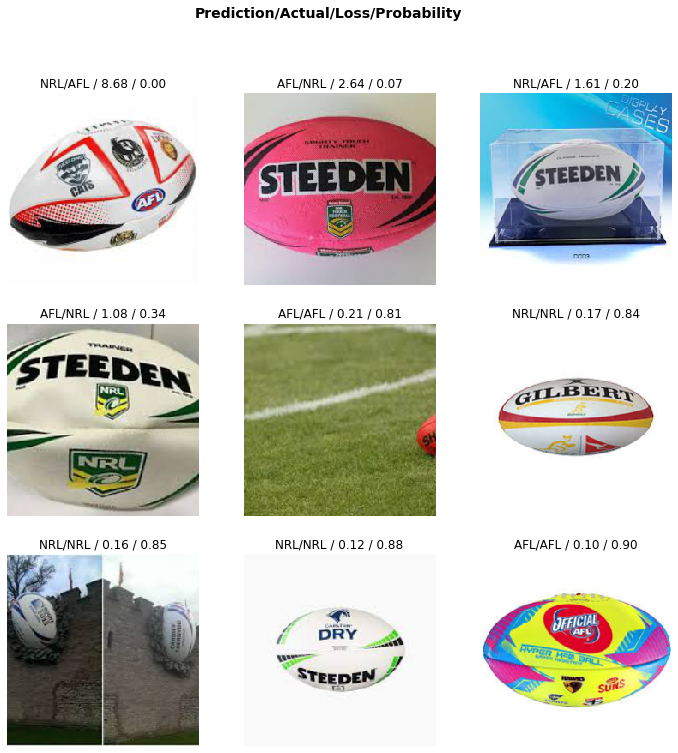

In [55]:
interp.plot_top_losses(9, figsize=(12,12))

In [0]:
learn.export(dest / 'ball-classifier')

## Prediction with unseen data

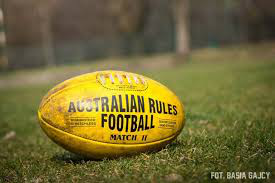

In [70]:
img = open_image( dest / "Test" / "yellow.jpeg")
img

In [71]:
pred_class, pred_idx, outputs = learn.predict(img); 
pred_class

Category AFL

**Nice**, its predicting the right class, lets try something different

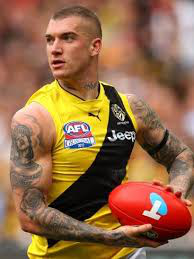

In [72]:
img = open_image( dest / "Test" / "dusty.jpeg")
img

In [74]:
pred_class, pred_idx, outputs = learn.predict(img); 
pred_class
#learn.predict(img)


Category AFL


**Dusty** is a legend of the **AFL** game! Very nice, lets try a rugby example

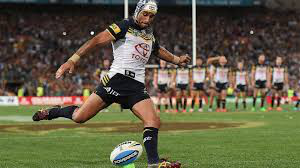

In [75]:
img = open_image( dest / "Test" / "jt.jpeg")
img

In [76]:
pred_class, pred_idx, outputs = learn.predict(img); 
pred_class

Category NRL

**Voohoo!** looks like the classifier is working! :-) **JT** is a legend of the **NRL**